# Projet final de Machine Learning 1 HAI817I

Ce projet s’inscrit dans le contexte de l’apprentissage supervisé, i.e. les données possèdent
des labels. Il vise à trouver les modèles les plus performants pour prédire si des articles de
presse sont vrais ou faux. Les articles contiennent des assertions (une assertion est une
proposition que l'on avance et que l'on soutient comme vraie) faites, par exemple, par des
hommes politiques

In [84]:
# ! pip install langdetect
# !pip install contractions
# ! pip install wordcloud

## Importation des bibliotheques et modules necessaires

In [2]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

# librairies générales
import pickle
import pandas as pd
from scipy.stats import randint
import numpy as np
import string
import time
import base64
import re
import sys
import contractions

# librairie BeautifulSoup
from bs4 import BeautifulSoup
# librairie affichage



## detection de language
import langdetect
import wordcloud
import nltk

from nltk import sent_tokenize
from nltk import RegexpParser
from nltk import pos_tag
from nltk import word_tokenize


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# Lemmatisateur
from nltk.stem import WordNetLemmatizer
# Racinisateur
from nltk.stem.porter import PorterStemmer
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

import spacy
from spacy.tokens import Span
from spacy.lang.en import English


from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin


# Modeles
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from tabulate import tabulate




# il est possible de charger l'ensemble des librairies en une seule fois
# décocher le commentaire de la ligne ci-dessous
#nltk.download('all')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('tagsets')
# nltk.download("stopwords")
# nltk.download('wordnet')

In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

import sklearn

# import some classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

# import modules for vectorizing and pipe
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline

# scale data
from sklearn.preprocessing import StandardScaler

# upsampling downsampling
from sklearn.utils import resample

# modules for model selection
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# modules for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score

# modules for vizualisation
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# others
import itertools
import random

from sklearn.exceptions import ConvergenceWarning



# import some classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline




In [4]:

# Dataset initial
train_df_init = pd.read_csv('HAI817_Project_data/HAI817_Projet_train.csv')
test_df_init = pd.read_csv('HAI817_Project_data/HAI817_Projet_test.csv')

# Dataset recent
train_df_latest = pd.read_csv('HAI817_Project_data/HAI817_Project_data/HAI817_Projet_train.csv')
test_df_latest = pd.read_csv('HAI817_Project_data/HAI817_Project_data/HAI817_Projet_train.csv')

train_df_init = train_df_init.fillna(' ')
test_df_init = test_df_init.fillna(' ')

In [5]:
# Initial
train_df_init.describe()

# print("----------------------------------------------------------------------------------------------------")

# Recent
test_df_latest.describe()

,public_id,text,title,our rating
count,1264,1264,1241,1264
unique,1115,1086,1070,4
top,cd9cd5e8,The late Robin Williams once called cocaine “G...,- The Washington Post,false
freq,2,4,4,578


In [6]:
# Un petit echantillon de 15 lignes pour commencer
sample = train_df_init.sample(15) 

In [85]:
# sample

In [86]:
# sample.info()
# sample = sample.values.tolist()
# sample

In [9]:
# sample

In [10]:
# For the content
# for record in sample:
#     text = record[1]
#     title = record[2]
# #     display(text)
# #     wc = wordcloud.WordCloud(background_color='black', max_font_size=30, max_words=100)
# #     text_wc = wc.generate(str(text))
# #     title_wc = wc.generate(str(title))
# #     print("Text size: ",len(text), " Title size: ", len(title), end="\n")
#     text_wc = wordcloud.WordCloud(background_color='black', max_font_size=30, max_words=100).generate_from_text(text=text)
#     title_wc = wordcloud.WordCloud(background_color='black', max_font_size=30, max_words=100).generate_from_text(text=title)
# #     fig = plt.figure(num=1)
    
#     # Create a figure with two subplots
#     fig, axs = plt.subplots(ncols=2, figsize=(15, 10) ) # figsize=(10, 5)
#     fig.suptitle(title)

#     # Plot the first wordcloud in the first subplot
#     axs[0].imshow(text_wc, cmap=None) # , interpolation='bilinear'
#     axs[0].set_title('Text')

#     # Plot the second wordcloud in the second subplot
#     axs[1].imshow(title_wc, cmap=None)
#     axs[1].set_title('Title')
    
#     # Remove axis ticks and labels
#     for ax in axs:
#         ax.set_xticks([])
#         ax.set_yticks([])
#         ax.set_xticklabels([])
#         ax.set_yticklabels([])

# #     plt.axis('off')
# #     plt.imshow(text_wc, title_wc,  cmap=None)
#     plt.show()
#     display(record)

## !Apparemment le texte et titre sont mal positionnes dans certains row et certains rows ont un texte de taille presqu'egale a celle du titre, Est-ce du bruit?

<AxesSubplot:xlabel='our rating', ylabel='count'>

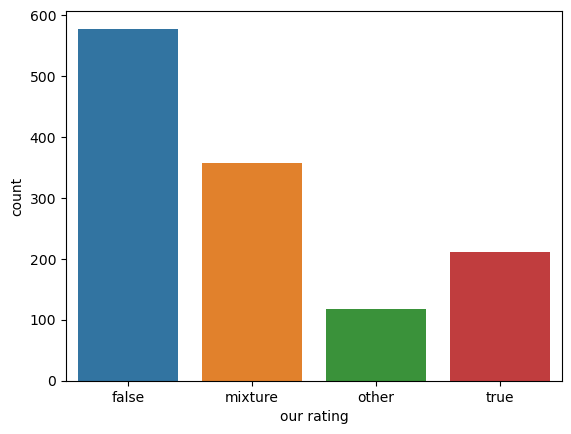

In [11]:
sns.countplot(x='our rating', data=train_df_init)

# Ingenierie des donnees

### Renommons le rating

In [12]:
train_df_init = train_df_init.rename(columns={"our rating": "rating"})

In [13]:
train_df_init.isnull().sum()

public_id    0
text         0
title        0
rating       0
dtype: int64

In [14]:
train_df_init.shape[0]

1264

In [15]:
train_df_init.rating

0         false
1       mixture
2       mixture
3         false
4         false
         ...   
1259       true
1260       true
1261      false
1262       true
1263       true
Name: rating, Length: 1264, dtype: object

## Elements utilitaires du cours

#### TextCleaner

In [16]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english')) 

def MyCleanText(X, 
               lowercase=False, # mettre en minuscule
               removestopwords=False, # supprimer les stopwords
               removedigit=False, # supprimer les nombres  
               getstemmer=False, # conserver la racine des termes
               getlemmatisation=False # lematisation des termes 
              ):
    
    sentence=str(X)

    # suppression des caractères spéciaux
    sentence = re.sub(r'[^\w\s]',' ', sentence)
    # suppression de tous les caractères uniques
    sentence = re.sub(r'\s+[a-zA-Z]\s+', ' ', sentence)
    # substitution des espaces multiples par un seul espace
    sentence = re.sub(r'\s+', ' ', sentence, flags=re.I)

    # decoupage en mots
    tokens = word_tokenize(sentence)
    if lowercase:
          tokens = [token.lower() for token in tokens]

    # suppression ponctuation
    table = str.maketrans('', '', string.punctuation)
    words = [token.translate(table) for token in tokens]

    # suppression des tokens non alphabetique ou numerique
    words = [word for word in words if word.isalnum()]
    
    # suppression des tokens numerique
    if removedigit:
        words = [word for word in words if not word.isdigit()]

    # suppression des stopwords
    if removestopwords:
        words = [word for word in words if not word in stop_words]

    # lemmatisation
    if getlemmatisation:
        lemmatizer=WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word)for word in words]
        

    # racinisation
    if getstemmer:
        ps = PorterStemmer()
        words=[ps.stem(word) for word in words]
        
    sentence= ' '.join(words)
  
    return sentence 

[nltk_data] Downloading package wordnet to /home/richard/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/richard/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/richard/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### TextNormailizer

In [17]:
class TextNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self, 
                 removestopwords=False, # suppression des stopwords
                 lowercase=False,# passage en minuscule
                 removedigit=False, # supprimer les nombres  
                 getstemmer=False,# racinisation des termes 
                 getlemmatisation=False # lemmatisation des termes  
                ):
        
        self.lowercase=lowercase
        self.getstemmer=getstemmer
        self.removestopwords=removestopwords
        self.getlemmatisation=getlemmatisation
        self.removedigit=removedigit

    def transform(self, X, **transform_params):
        # Nettoyage du texte
        X=X.copy() # pour conserver le fichier d'origine
        return [MyCleanText(text,lowercase=self.lowercase,
                            getstemmer=self.getstemmer,
                            removestopwords=self.removestopwords,
                            getlemmatisation=self.getlemmatisation,
                            removedigit=self.removedigit) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self
    
    def fit_transform(self, X, y=None, **fit_params):
        return self.fit(X).transform(X)

    def get_params(self, deep=True):
        return {
            'lowercase':self.lowercase,
            'getstemmer':self.getstemmer,
            'removestopwords':self.removestopwords,
            'getlemmatisation':self.getlemmatisation,
            'removedigit':self.removedigit
        }    
    
    def set_params (self, **parameters):
        for parameter, value in parameters.items():
            setattr(self,parameter,value)
        return self    


#### TrueFalseMixer

In [18]:
def TrueFalseMixer(x):
    if x=="true" or x=="false":
        return "true_or_false"
    else: 
        return "mixture"

In [19]:
train_df_init = pd.read_csv('HAI817_Project_data/HAI817_Projet_train.csv')
train_df_init = train_df_init.rename(columns={"our rating": "rating"})

test_df_init = pd.read_csv("HAI817_Project_data/HAI817_Projet_test.csv")
test_df_init = test_df_init.rename(columns={"our rating": "rating"})

train_df_init = train_df_init.fillna(' ')
test_df_init = test_df_init.fillna(' ')

train_df_init['text'] = train_df_init['title'] + " "+train_df_init['text']
test_df_init['text'] = test_df_init['title'] + " "+test_df_init['text']

test_df_init.head()

,ID,text,title,rating
0,122653045997905671927713471889615536378,US Treasury deputy sec warns that shortages li...,US Treasury deputy sec warns that shortages li...,mixture
1,275389285957305997321446227088442471741,CNN Praises Taliban For Wearing Masks During A...,CNN Praises Taliban For Wearing Masks During A...,other
2,333248764296609831067233855420575814716,Tennessee Has Just LEGALIZED Government COVID ...,Tennessee Has Just LEGALIZED Government COVID ...,false
3,264019763253447756851916399533799891538,MEDICAL SHOCKER: Scientists at Sloan Kettering...,MEDICAL SHOCKER: Scientists at Sloan Kettering...,false
4,158073737187690682830899773280916034317,Study Results: Facemasks are Ineffective to Bl...,Study Results: Facemasks are Ineffective to Bl...,false


In [20]:
# train_df_init = pd.read_csv('HAI817_Project_data/HAI817_Projet_train.csv')
# train_df_init = train_df_init.rename(columns={"our rating": "rating"})
# test_df_init = pd.read_csv("HAI817_Project_data/HAI817_Projet_test.csv")
# test_df_init = test_df_init.rename(columns={"our rating": "rating"})

# train_df_init = train_df_init.fillna(' ')
# test_df_init = test_df_init.fillna(' ')

# test_df_init.head()

#### Resampler

In [21]:
def Resampler( df, classif_type=0):
    smallest_size = 0
    smallest = ""
     # true false other mixture
    df["rating"].value_counts().plot(kind='pie', 
                                  autopct='%1.1f%%',
                                  label = "Classe",
                                  title='Data overview', 
                                  fontsize=11, 
                                  legend=True)
    plt.show()
    
    if classif_type==0:
        """
        resampling pour Vrai vs Faux
        """
        df
        falses = df[df["rating"] == "false"]
        trues = df[df["rating"] == "true"] 
        
    
        # find smallest between trues and falses and dropping other types
        smallest = "true" if trues.shape[0] <= falses.shape[0]   else "false"
        smallest_size = trues.shape[0] if trues.shape[0] <= falses.shape[0] else falses.shape[0]

        df = pd.concat([falses, trues]) # df[df["rating"] == smallest]
        
        df["rating"].value_counts().plot(kind='pie', 
                                      autopct='%1.1f%%',
                                      label = "Classe",
                                      title='Before', 
                                      fontsize=11, 
                                      legend=True)
        plt.show()
#         print("True: ", trues.shape[0]," False: ", falses.shape[0], "Smallest: ", smallest, " Size:", smallest_size)
        df = df[df["rating"] == smallest]
        if smallest == "true":
            df = pd.concat([df, falses.sample(smallest_size)]) 
        else:
            df = pd.concat([df, trues.sample(smallest_size)]) # df.append(trues.sample(smallest_size))
    
    
    if classif_type==1:
        """
        resampling pour (Vrai, Faux) vs mixture
        """
        df["rating"] = df["rating"].apply(TrueFalseMixer)
        df["rating"].value_counts().plot(kind='pie', 
                                      autopct='%1.1f%%',
                                      label = "Classe",
                                      title='Before', 
                                      fontsize=11, 
                                      legend=True)
        plt.show()
        true_and_false = df[df["rating"] == "true_or_false"]
        mixtures = df[df["rating"] == "mixture"]
        
        
        # find smallest between trues and falses and dropping other types
        smallest = "true_or_false" if true_and_false.shape[0] <= mixtures.shape[0]   else "mixture"
        smallest_size = true_and_false.shape[0] if true_and_false.shape[0] <= mixtures.shape[0] else mixtures.shape[0]
#         print("True fs: ", true_and_false.shape[0]," Mix: ", mixtures.shape[0], "Smallest: ", smallest, " Size:", smallest_size)
        
#         display(df)
        df = df[df["rating"] == smallest]
        
        
        if  "true_or_false" in smallest:
            df = pd.concat([df, mixtures.sample(smallest_size)]) 
        else:
            df = pd.concat([df, true_and_false.sample(smallest_size)])
            
    
    
    if classif_type==2:
        """
        resampling pour Vrai vs Faux
        """
        # true false other mixture
        falses = df[df["rating"] == "false"]
        trues = df[df["rating"] == "true"]
        others = df[df["rating"] == "other"]
        mixtures = df[df["rating"] == "mixture"]
        
        
        
        classes_dict = {
            "true": trues.shape[0],
            "false": falses.shape[0],
             "other": others.shape[0], 
            "mixture": mixtures.shape[0],
        }
        
        # find smallest between trues and falses and dropping other types
        smallest_size = list(classes_dict.values())[0]
        smallest = list(classes_dict.keys())[0]
        
        for key, val in classes_dict.items():
            if val <= smallest_size:
                smallest_size = val
                smallest = key
        
        
        df = df[df["rating"] == smallest]
        
        if smallest == "true":
            df = pd.concat([df, 
                            falses.sample(smallest_size), 
                            others.sample(smallest_size), 
                            mixtures.sample(smallest_size)]) 
            
        elif smallest == "false":
            df = pd.concat([df, 
                            true.sample(smallest_size), 
                            others.sample(smallest_size), 
                            mixtures.sample(smallest_size)]) 
            
        elif smallest == "other":
            df = pd.concat([df, 
                            trues.sample(smallest_size), 
                            falses.sample(smallest_size), 
                            mixtures.sample(smallest_size)])
        
        else:
            df = pd.concat([df, 
                            trues.sample(smallest_size), 
                            falses.sample(smallest_size), 
                            others.sample(smallest_size)])
    
    
    # Shuffle the df to make data random
    df = df.sample(frac=1)
    df["rating"].value_counts().plot(kind='pie', 
                                  autopct='%1.1f%%',
                                  label = "Classe",
                                  title='Resampled', 
                                  fontsize=11, 
                                  legend=True)
    plt.show()
    return df

### DataCleanerForClassification

In [37]:
def DataCleanerForClassification( df, classif_type=0):
    
    df['text'] = df['title'] + " "+df['text']
    
    if classif_type==0:
        df =  df[df["rating"] == "false"] ,df[ df["rating"] == "true"]
    
    if classif_type==1:
        df["rating"] = df["rating"].apply(TrueFalseMixer)
        
        
#     df["rating"].value_counts().plot(kind='pie', 
#                                   autopct='%1.1f%%',
#                                   label = "Classe",
#                                   title='Data overview', 
#                                   fontsize=11, 
#                                   legend=True)
#     plt.show()
    return df

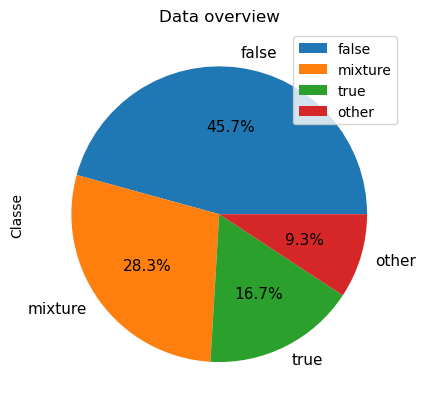

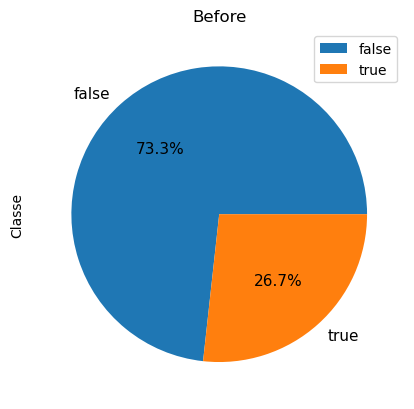

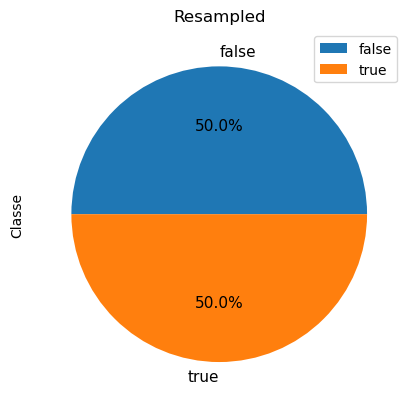

,public_id,text,title,rating
150,ec992d76,ICE Detainer Issued for Suspected Wine Country...,ICE Detainer Issued for Suspected Wine Country...,false
446,c7ea6a6e,"Flooding of Coast, Caused by Global Warming, H...","Flooding of Coast, Caused by Global Warming, H...",false
499,69e7cad4,GEORGIA BECOMES FIRST STATE TO BAN MUSLIM CULT...,GEORGIA BECOMES FIRST STATE TO BAN MUSLIM CULT...,false
1241,e6907337,Turkey joins hands with Pakistan to spread unr...,Turkey joins hands with Pakistan to spread unr...,false
66,4180cb6a,"Pennsylvania rejects 372,000 mail-in ballots, ...","Pennsylvania rejects 372,000 mail-in ballots, ...",false
...,...,...,...,...
429,d2d3b970,Ofsted admits some 'outstanding schools aren't...,Ofsted admits some 'outstanding schools aren't...,true
727,b9ccbcb4,New Eavesdropping Equipment Sucks All Data Off...,New Eavesdropping Equipment Sucks All Data Off...,false
525,0c4a9e4b,Trump Promised To Bring Jobs Back To Pennsylva...,Trump Promised To Bring Jobs Back To Pennsylva...,true
180,0a7d532e,CDC Announces That Students May Be Kept From P...,CDC Announces That Students May Be Kept From P...,false


In [23]:
dft = Resampler(df=train_df_init, classif_type=0)
display(dft)

In [24]:
def preprocess_selection(model_name,model,X,y,lowercase=False):
    CV_brut = Pipeline([('cleaner', TextNormalizer()), 
                        ('count_vectorizer', CountVectorizer(lowercase=False)),
                        (model_name, model)])
    CV_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                                getstemmer=False,removedigit=False)), 
                        ('count_vectorizer', CountVectorizer(lowercase=lowercase)),
                        (model_name, model)])
    CV_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                                getstemmer=False,removedigit=False)), 
                        ('count_vectorizer', CountVectorizer(lowercase=lowercase)),
                        (model_name, model)])

    CV_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                                getstemmer=True,removedigit=False)), 
                        ('count_vectorizer', CountVectorizer(lowercase=lowercase)),
                        (model_name, model)])
    
    CV_lowStopna = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                                getstemmer=True,removedigit=True)), 
                        ('count_vectorizer', CountVectorizer(lowercase=lowercase)),
                        (model_name, model)])

    TFIDF_brut = Pipeline ([('cleaner', TextNormalizer()), 
                        ('tfidf_vectorizer', TfidfVectorizer(lowercase=lowercase)),
                        (model_name, model)])

    TFIDF_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                                getstemmer=False,removedigit=False)), 
                        ('tfidf_vectorizer', TfidfVectorizer(lowercase=lowercase)),
                        (model_name, model)])
    TFIDF_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                                getstemmer=False,removedigit=False)), 
                        ('tfidf_vectorizer', TfidfVectorizer(lowercase=lowercase)),
                        (model_name, model)])

    TFIDF_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                                getstemmer=True,removedigit=False)), 
                        ('tfidf_vectorizer', TfidfVectorizer(lowercase=lowercase)),
                        (model_name, model)])
    TFIDF_lowStopna = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                                getstemmer=True,removedigit=True)), 
                        ('tfidf_vectorizer', TfidfVectorizer(lowercase=lowercase)),
                        (model_name, model)])

    all_models = [
        ("CV_brut", CV_brut),
        ("CV_lowcase", CV_lowcase),
        ("CV_lowStop", CV_lowStop),
        ("CV_lowStopstem",CV_lowStopstem),
        ("CV_lowStopna",CV_lowStopna),
        ("TFIDF_lowStopna", TFIDF_lowStopna),
        ("TFIDF_lowcase", TFIDF_lowcase),
        ("TFIDF_lowStop", TFIDF_lowStop),
        ("TFIDF_lowStopstem",TFIDF_lowStopstem),
        ("TFIDF_brut", TFIDF_brut),
    ]

    print ("Evaluation des différentes configurations : ")
    unsorted_scores = [(name, cross_val_score(model, X, y, cv=10).mean()) for name, model in all_models]
    scores = sorted(unsorted_scores, key=lambda x: -x[1])


    print(tabulate(scores, floatfmt='.4f', headers=('Pipeline', 'Score')))
     

In [25]:
X = dft['title']+" "+dft['text']
# X = X.drop("rating", axis=1)
# display(X)
y = dft['rating']
y

150     false
446     false
499     false
1241    false
66      false
        ...  
429      true
727     false
525      true
180     false
630      true
Name: rating, Length: 422, dtype: object

In [26]:
X_s = X # X.sample(200)
y_s = y.loc[X_s.index]
preprocess_selection("multinomial_nb",MultinomialNB(),X_s,y_s)

Evaluation des différentes configurations : 
Pipeline             Score
-----------------  -------
CV_brut             0.7514
CV_lowStop          0.7442
CV_lowcase          0.7419
CV_lowStopstem      0.7395
TFIDF_lowStop       0.7229
TFIDF_lowStopna     0.7229
CV_lowStopna        0.7183
TFIDF_brut          0.7179
TFIDF_lowStopstem   0.7133
TFIDF_lowcase       0.7110


#### Matrice de confusion

In [27]:

def plot_confusion_matrix(cm, classes=[],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = 2*cm.max() / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')


def encode_true_and_false(val):
    if val == "true" or val == "True":
        return 1
    else:
        return 0

def plot_quad_error(X,y,model):
    arr1=[];arr2=[]
#     print("X: ", X.shape," y: ", y.shape)
    size = np.linspace(200 ,int(len(X)), 100).astype('int32') # if X.shape[0] >= 200 else X.shape[0]
    for m in size:
        X_s =  X.sample(m)
        y_s = y.loc[X_s.index.intersection(y.index)] # .intersection(y.index)

        X_train,X_val,y_train,y_val = train_test_split(X_s,y_s,train_size=0.7,random_state=42)
        clf = model.fit(X_train, y_train)
        y_pred_train = clf.predict(X_train)
#         y_pred_train = y_pred.shape[0]
        y_pred_val = clf.predict(X_val)
#         y_pred_val = y_pred.shape[0]
        y_pred_train=np.vectorize(encode_true_and_false)(y_pred_train)
        y_pred_val=np.vectorize(encode_true_and_false)(y_pred_val)
        y_train=np.vectorize(encode_true_and_false)(y_train)
        y_val=np.vectorize(encode_true_and_false)(y_val)
#         print("y_pred_train: ", y_pred_train, "y_train: ", y_train, sep='\n')
        squarred_error_train = (1/len(y_pred_train))*np.sum((y_pred_train - y_train)**2)
        squared_error_CV = (1/len(y_pred_val))*np.sum((y_pred_val - y_val)**2)
        arr1.append(squarred_error_train)
        arr2.append(squared_error_CV)

    plt.plot(size,arr1,label='train error')
    plt.plot(size,arr2,label='cv error')
    plt.xlabel("Training Size")
    plt.gca().set_xlim([100,len(X)])
    plt.ylabel("Quadratic Error")
    plt.title("Model Evaluation")
    plt.legend()
    plt.show()
     

In [28]:
#         print("X_s.index: ", X_s.index, " y_index: ", y_s.index, "X.index:", X.index, "y.index:", y.index, sep='\n')
#         y_s = y.sample(m)
#         X_s = X.loc[y_s.index] # .intersection(X.index)
#         print("X_s: ", X_s.shape," y_s: ", y_s.shape)

In [29]:
dft.head()

,public_id,text,title,rating
150,ec992d76,ICE Detainer Issued for Suspected Wine Country...,ICE Detainer Issued for Suspected Wine Country...,false
446,c7ea6a6e,"Flooding of Coast, Caused by Global Warming, H...","Flooding of Coast, Caused by Global Warming, H...",false
499,69e7cad4,GEORGIA BECOMES FIRST STATE TO BAN MUSLIM CULT...,GEORGIA BECOMES FIRST STATE TO BAN MUSLIM CULT...,false
1241,e6907337,Turkey joins hands with Pakistan to spread unr...,Turkey joins hands with Pakistan to spread unr...,false
66,4180cb6a,"Pennsylvania rejects 372,000 mail-in ballots, ...","Pennsylvania rejects 372,000 mail-in ballots, ...",false


In [30]:
X = dft["text"]
y = dft["rating"]
text_normalizer= TextNormalizer(removestopwords=False,lowercase=True,getstemmer=False,removedigit=False) 
X=text_normalizer.fit_transform(X)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [31]:
# print(X, y)

variance ratio:  [0.01927831 0.01622372]
variance ratio sum:  0.0355020293032471
singular values: [9.04111744 2.37289928]


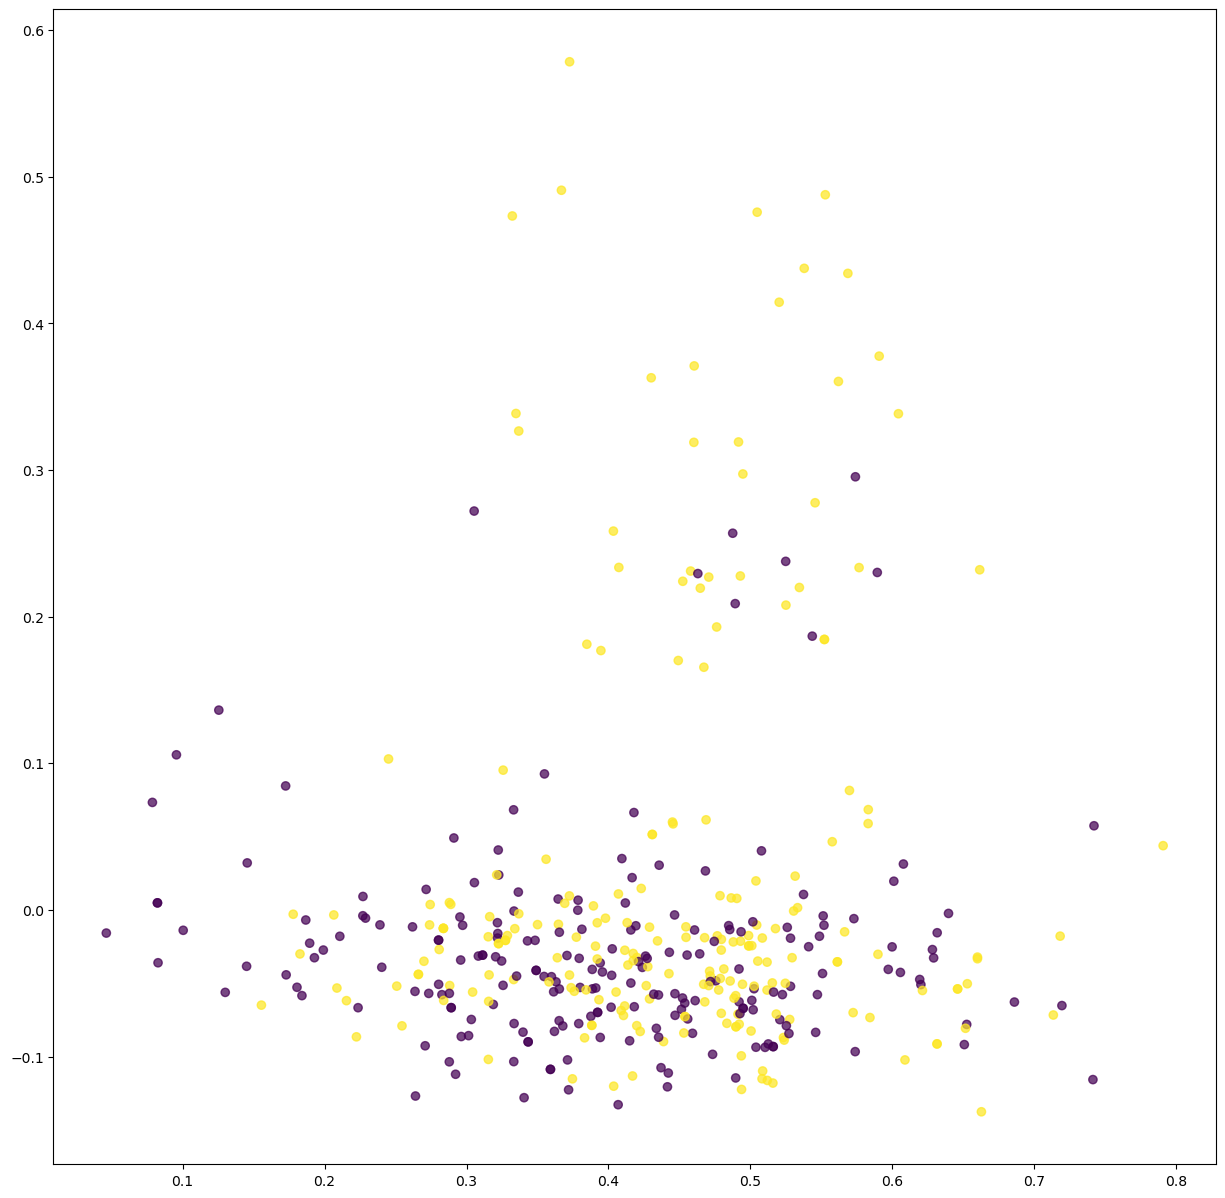

In [32]:

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder

svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

# Encode the classes' label as integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("variance ratio: ",svd.explained_variance_ratio_)

print("variance ratio sum: ",svd.explained_variance_ratio_.sum())
print("singular values:" ,svd.singular_values_)


fig,ax = plt.subplots(figsize=(15,15))
ax.scatter(X_svd[:,0], X_svd[:,1], alpha=0.72, c=y_encoded)
plt.show()

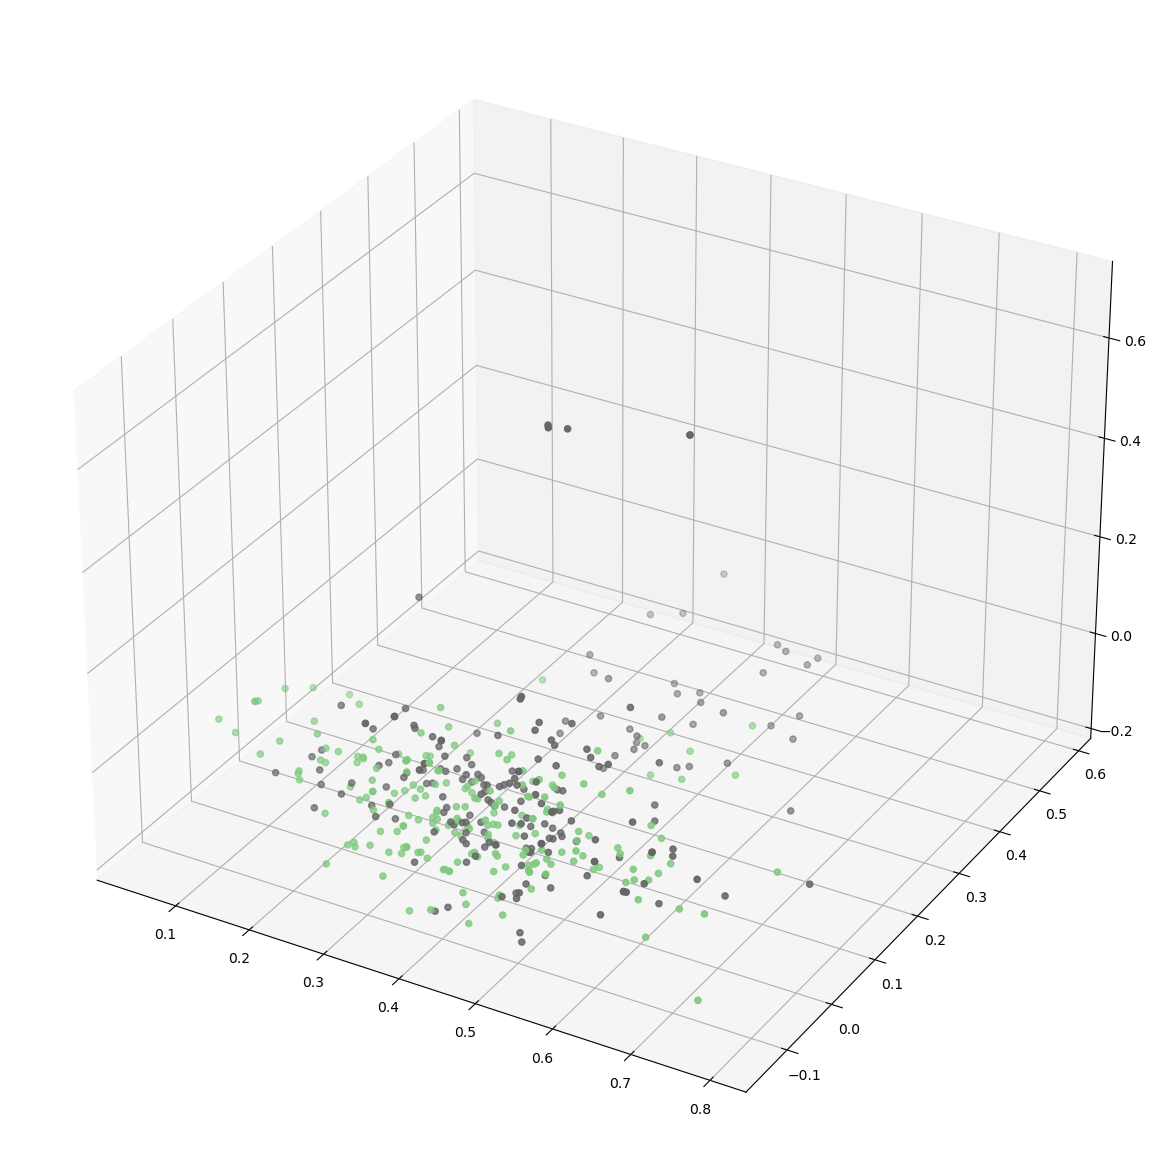

In [33]:

from mpl_toolkits.mplot3d import Axes3D

# Encode the classes' label as integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

svd = TruncatedSVD(n_components=3)
X_svd = svd.fit_transform(X)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')


ax.scatter(X_svd[:1000,0],X_svd[:1000,1],
     X_svd[:1000,2],c=y_encoded, cmap='Accent') 
plt.show()

# Classifications

## Classification Vrai vs Faux

### Logistic Regression

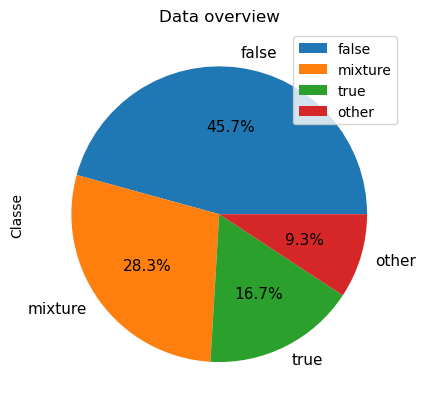

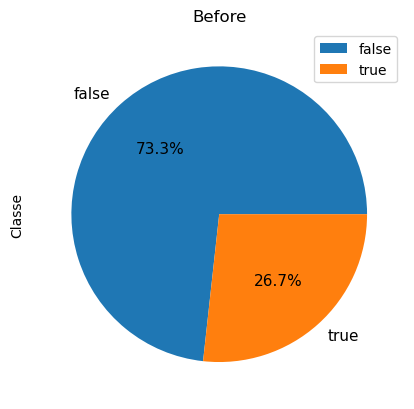

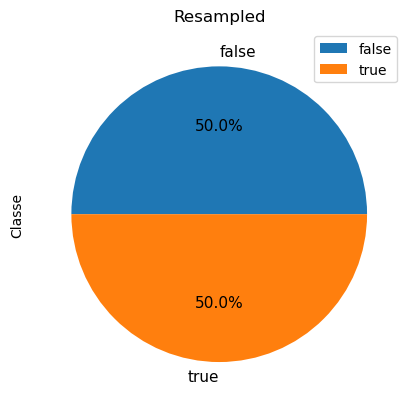

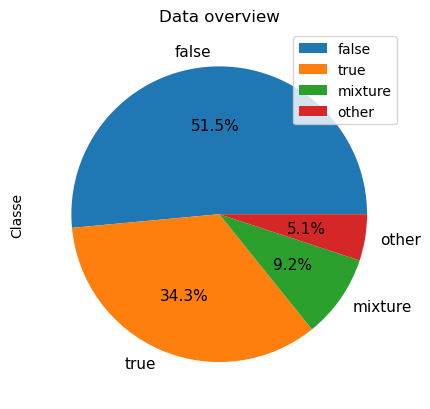

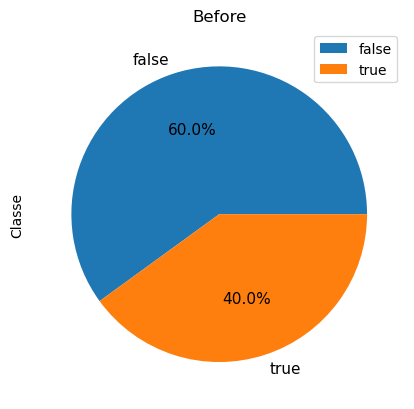

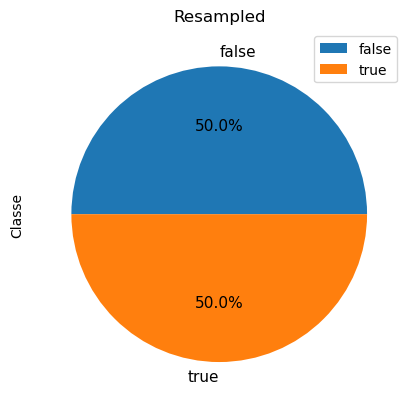

['00' '000' '0008' ... 'zoom' 'zoonotic' 'zoos']


In [47]:
# text = np.concatenate((df_train["text"],df_test["text"]))
# label = np.concatenate((df_train["label"],df_test["label"]))

df_train = Resampler(train_df_init, classif_type=0)
df_test = Resampler(test_df_init, classif_type=0)

text = df_train['text']
rating = df_train['rating']

arr = [i for i in range(len(df_train) + len(df_test))]
# print(arr, text)
idx = np.random.choice(arr,  250) #  int( len(df_train) / 2)
# print(idx)

text = np.concatenate((df_train["text"],df_test["text"]))
text = text[idx]


rating = np.concatenate(([df_train['rating'], df_test['rating']]))
rating = rating[idx]
# pd.DataFrame(rating).head()

text_normalizer=TextNormalizer(lowercase=True)  
text=text_normalizer.fit_transform(text)
text = np.array(text)
# print(text)


vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(text)
corpus = np.array(vectorizer.get_feature_names())
print(corpus)

In [48]:

def get_fake_no_fake_text(text):
    fake_text = np.array(text[rating == 'false'])
    non_fake_text = np.array(text[rating == 'true'])
    return fake_text,non_fake_text



def compute_frequency(fake_text,non_fake_text):
  # Computes 2 different frequency use of dictionary for O(1) time acces to value of a paticular word
    fake_text = " ".join(fake_text)
    fake_text = word_tokenize(fake_text)
    non_fake_text = " ".join(non_fake_text)
    non_fake_text = word_tokenize(non_fake_text)
    corpus = np.unique(np.concatenate((fake_text,non_fake_text),axis=0))

    FakeFreq = {w:0 for w in corpus}
    NonFakeFreq = {w:0 for w in corpus}

    for word in fake_text:
        FakeFreq[word] += 1

    for word in non_fake_text:
        NonFakeFreq[word] += 1

    return FakeFreq,NonFakeFreq

In [49]:
fake_text,non_fake_text= get_fake_no_fake_text(text)
FakeFreq,NonFakeFreq = compute_frequency(fake_text,non_fake_text)

In [50]:

def feat_extraction_fake(row):
    row_text = word_tokenize(row)
    sum_fake_freq = 0
    for word in row_text:
        if word in FakeFreq.keys():
#             print("word: ", word, " FakeFreq[word]:", FakeFreq[word])
            sum_fake_freq += FakeFreq[word]
    return sum_fake_freq

def feat_extraction_no_fake(row):
    row_text = word_tokenize(row)
    sum_non_fake_freq = 0
    for word in row_text:
        if word in NonFakeFreq.keys():
            sum_non_fake_freq += NonFakeFreq[word]
    return sum_non_fake_freq


In [51]:
def conf_matrix(model):
    ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test
    )
    
    
    
def class_report(model):
    print(classification_report(
        Y_test,
        model.predict(X_test)
    ))

In [52]:
# text.shape

In [53]:
dfbis_train = pd.DataFrame(text,columns=["text"])

# dfbis_train["bias"] = 1

dfbis_train["false"] = dfbis_train["text"].apply(feat_extraction_fake)

dfbis_train["true"] = dfbis_train["text"].apply(feat_extraction_no_fake) # , args=[NonFakeFreq]

X = dfbis_train[['false', 'true']]
# X = dfbis_train['text']
y = pd.DataFrame(rating)
# dfbis_train

# text = pd.DataFrame(text)
# text.sample(10)
# dfbis_train.sample(10)
# X.sample(10)
# X

 #### Training

In [54]:
# ps = PorterStemmer()
# def stemming(content):
#     stemmed_content = re.sub('[^a-zA-Z]',' ',content)
#     stemmed_content = stemmed_content.lower()
#     stemmed_content = stemmed_content.split()
#     stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
#     stemmed_content = ' '.join(stemmed_content)
#     return stemmed_content

In [55]:
# # dfbis_train.sample(2)
# dfbis_train["text"] = dfbis_train["text"].apply(stemming)

# X = dfbis_train["text"]
# y = rating

# vector = TfidfVectorizer()
# vector.fit(X)
# X = vector.transform(X)

# # X.sample(2)
# print(X)

In [56]:
# X


X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)

clf = LogisticRegression(random_state=42).fit(X_train, y_train)

y_pred = clf.predict(X_test)

target_names = ["false","true"]

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred)) # target_names=target_names

accuracy 0.8266666666666667
              precision    recall  f1-score   support

       false       0.79      0.81      0.80        32
        true       0.86      0.84      0.85        43

    accuracy                           0.83        75
   macro avg       0.82      0.82      0.82        75
weighted avg       0.83      0.83      0.83        75



/home/richard/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix, without normalization


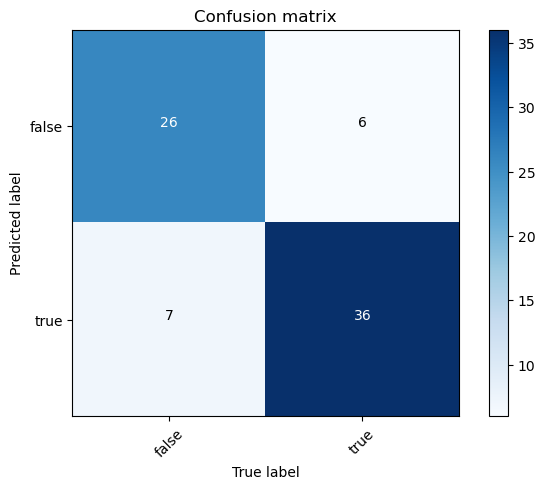

In [57]:

plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=target_names)
# confusion_matrix(y_test, y_pred)
# conf_matrix(clf)

### Naives Bayes

In [58]:

X = df_train["text"]
y = df_train["rating"] 

text_normalizer= TextNormalizer(removestopwords=True,lowercase=True,getstemmer=True,removedigit=True) 
X=text_normalizer.fit_transform(X)

In [59]:
X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.7,random_state=42)

nb = Pipeline([('vect', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_val)

print('accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred))

accuracy 0.7716535433070866
              precision    recall  f1-score   support

       false       0.82      0.70      0.76        64
        true       0.74      0.84      0.79        63

    accuracy                           0.77       127
   macro avg       0.78      0.77      0.77       127
weighted avg       0.78      0.77      0.77       127



### La Cross Validation

In [60]:

X = df_train["text"]
y = df_train["rating"]

# found when testing different parameters in the preprocessing  
text_normalizer= TextNormalizer(removestopwords=False,lowercase=True,getstemmer=False,removedigit=False) 
X=text_normalizer.fit_transform(X)

models = []
models.append(('LRegression', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('MultinomialNB', MultinomialNB()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('SGDClassifier',SGDClassifier()))
models.append(('RandomForest', RandomForestClassifier()))

In [61]:

results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, shuffle=True)
  model = make_pipeline(TfidfVectorizer(), model)
  cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LRegression: 0.730011 (0.087906)
KNN: 0.656091 (0.050689)
MultinomialNB: 0.720100 (0.080280)
DecisionTreeClassifier: 0.651218 (0.085843)
SVM: 0.749059 (0.065484)
SGDClassifier: 0.760520 (0.073410)
RandomForest: 0.732337 (0.070080)


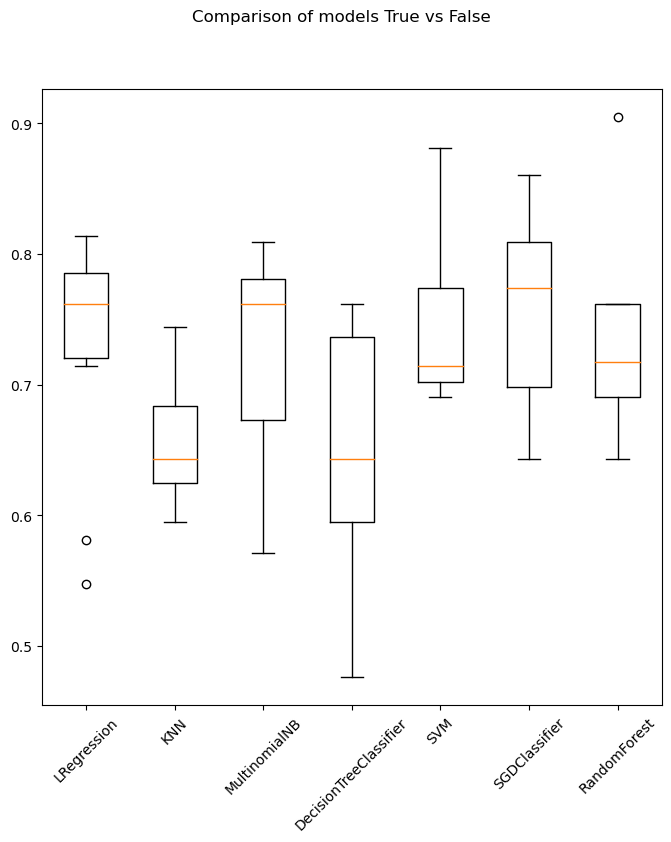

In [62]:
classes = ["True", "False"]
fig = plt.figure(figsize=(8,8))
if len(classes)>2:
  fig.suptitle('Comparison of models {} vs {} vs {}'.format(classes[0],classes[1],classes[2]))
else:
  fig.suptitle('Comparison of models {} vs {}'.format(classes[0],classes[1]))  
ax = fig.add_subplot(111)
ax.boxplot(results)
ax.set_xticklabels(names,rotation = 45)
plt.show()

### Hyperparameters finding process

### Grid Search CV

### Logistic Regression

In [63]:
X = df_train["text"]
y = df_train["rating"] 

X_s = X # X.sample(300) # X if X.shape[0] <=700 else X.sample(700)
y_s = y.loc[X_s.index]
preprocess_selection("logistic_regression",LogisticRegression(
#     n_jobs=-1
),X_s,y_s)

Evaluation des différentes configurations : 


/home/richard/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/richard/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

/home/richard/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/richard/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Pipeline             Score
-----------------  -------
CV_lowStop          0.7676
TFIDF_lowStop       0.7606
TFIDF_lowStopstem   0.7581
CV_lowStopna        0.7581
CV_lowcase          0.7536
TFIDF_lowStopna     0.7511
CV_lowStopstem      0.7510
CV_brut             0.7442
TFIDF_lowcase       0.7439
TFIDF_brut          0.7415


In [64]:

X = df_train["text"]
y = df_train["rating"]

# put text normalizer in the pipe is a bad idea because of the very long time processing
text_normalizer = TextNormalizer(removestopwords=False,lowercase=True,getstemmer=False,removedigit=False)
X = text_normalizer.fit_transform(X)

X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.7,random_state=42)

pipe = Pipeline([('vect', TfidfVectorizer()),
               ('clf', LogisticRegression(solver='lbfgs')),
               ])

grid = {"clf__penalty": ['l2' ,'none'],
        "clf__C":np.logspace(-2,2,4),
        "clf__max_iter":[100,1000]}

gd_srLR = GridSearchCV(pipe,  
                     param_grid=grid,
                     scoring='accuracy',
                     cv=10,
#                      n_jobs=-1,
                    return_train_score=True)

gd_srLR.fit(X_train, y_train)
print('meilleur score ',
 gd_srLR.best_score_,'\n')
print('meilleurs paramètres',
 gd_srLR.best_params_,'\n')
print('meilleur estimateur',
gd_srLR.best_estimator_,'\n')

/home/richard/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/richard/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/richard/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/richard/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/richard/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/richard/anaconda3/lib/python3.9/site-packages/sklearn/linea

/home/richard/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/richard/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/richard/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/richard/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/richard/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/richard/anaconda3/lib/python3.9/site-packages/sklearn/linea

meilleur score  0.752183908045977 

meilleurs paramètres {'clf__C': 100.0, 'clf__max_iter': 100, 'clf__penalty': 'l2'} 

meilleur estimateur Pipeline(steps=[('vect', TfidfVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100.0))]) 




 accuracy:  0.7480314960629921 


               precision    recall  f1-score   support

       false       0.74      0.77      0.75        64
        true       0.75      0.73      0.74        63

    accuracy                           0.75       127
   macro avg       0.75      0.75      0.75       127
weighted avg       0.75      0.75      0.75       127

Confusion matrix, without normalization


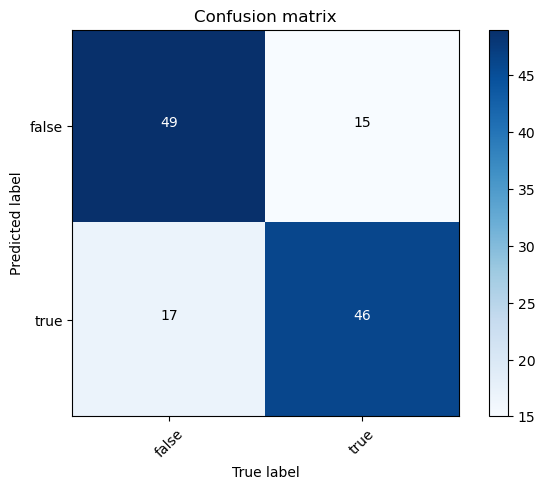

In [65]:

# Creation d'une instance de l'algorithme en utilisant les meilleurs paramètres
lr = gd_srLR.best_estimator_

lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
print('\n accuracy: ', accuracy_score(y_pred, y_val),'\n')

print('\n',classification_report(y_val, y_pred))
plot_confusion_matrix(confusion_matrix(y_val, y_pred),classes = target_names)

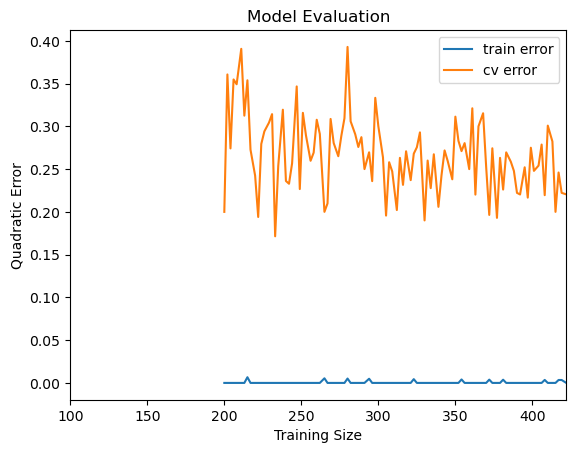

In [66]:

X = df_train["text"]
y = df_train["rating"]
text_normalizer = TextNormalizer(removestopwords=True,lowercase=True,getstemmer=True,removedigit=False)


# print("From call:  X.index: ",X.index, "y.index", y.index)
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)


X = text_normalizer.fit_transform(X)

# X = X.reset_index(drop=True)
# y = y.reset_index(drop=True)

X = pd.Series(X)

plot_quad_error(X,y,lr)


 accuracy:  0.5142857142857142 


               precision    recall  f1-score   support

       false       0.51      0.98      0.67       210
        true       0.69      0.05      0.10       210

    accuracy                           0.51       420
   macro avg       0.60      0.51      0.38       420
weighted avg       0.60      0.51      0.38       420

Confusion matrix, without normalization


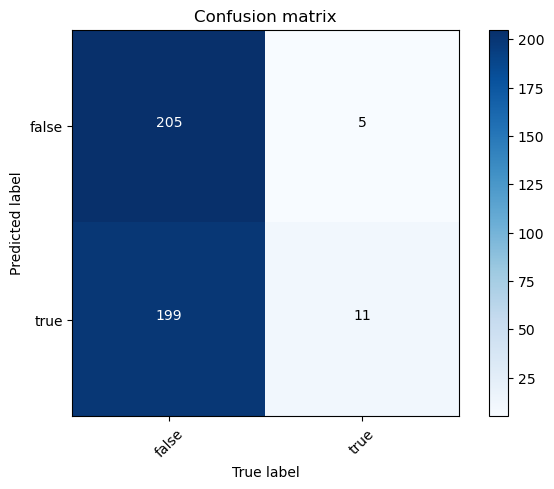

In [67]:

X_test,y_test = df_test["text"],df_test["rating"]
y_pred = lr.predict(X_test)
print('\n accuracy: ', accuracy_score(y_pred, y_test),'\n')

print('\n',classification_report(y_test, y_pred)) # ,target_names=classes
plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes = target_names)

### Svc

In [68]:

X = df_train["text"]
y = df_train["rating"] 

X_s = X # X.sample(300) # X if X.shape[0] <=700 else X.sample(700)
y_s = y.loc[X_s.index]
preprocess_selection("SVC",SVC(),X_s,y_s)

Evaluation des différentes configurations : 
Pipeline             Score
-----------------  -------
TFIDF_lowStopstem   0.7606
TFIDF_lowcase       0.7580
TFIDF_lowStopna     0.7558
TFIDF_lowStop       0.7488
TFIDF_brut          0.7368
CV_lowStopna        0.7063
CV_lowStopstem      0.7039
CV_lowStop          0.7038
CV_brut             0.6848
CV_lowcase          0.6777


In [69]:

X = df_train["text"]
y = df_train["rating"]
# put text normalizer in the pipe is a bad idea because of the very long time processing
text_normalizer = TextNormalizer(removestopwords=True,lowercase=True,getstemmer=True,removedigit=False)
X = text_normalizer.fit_transform(X)
X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.7,random_state=42)

pipe = Pipeline([('vect', TfidfVectorizer()),
               ('clf', SVC()),
              ])

grid = {'clf__C': [100, 5000], 
        'clf__kernel': ['linear'],
        'clf__gamma': [0.001, 0.0001], 
        'clf__kernel': ['rbf']}

gd_srSVC = GridSearchCV(pipe,  
                     param_grid=grid,
                     scoring='accuracy',
                     cv=10,
#                      n_jobs=-1,
                    return_train_score=True)

gd_srSVC.fit(X_train, y_train)
print('meilleur score ',
 gd_srSVC.best_score_,'\n')
print('meilleurs paramètres',
 gd_srSVC.best_params_,'\n')
print('meilleur estimateur',
gd_srSVC.best_estimator_,'\n')

meilleur score  0.7588505747126437 

meilleurs paramètres {'clf__C': 5000, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'} 

meilleur estimateur Pipeline(steps=[('vect', TfidfVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SVC(C=5000, gamma=0.001))]) 




 accuracy:  0.7401574803149606 


               precision    recall  f1-score   support

       false       0.72      0.78      0.75        64
        true       0.76      0.70      0.73        63

    accuracy                           0.74       127
   macro avg       0.74      0.74      0.74       127
weighted avg       0.74      0.74      0.74       127

Confusion matrix, without normalization


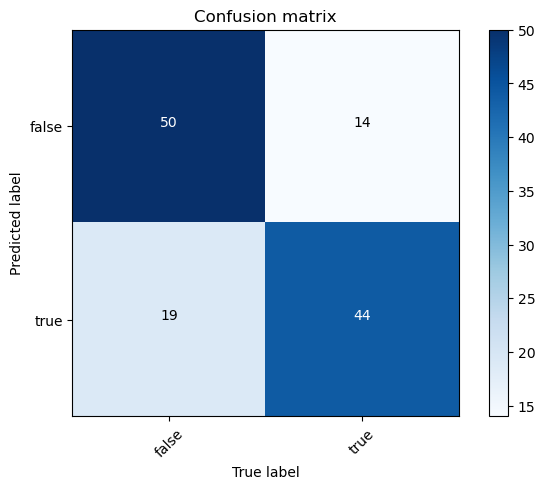

In [70]:

# Creation d'une instance de l'algorithme en utilisant les meilleurs paramètres
svm = gd_srSVC.best_estimator_

svm.fit(X_train, y_train)
y_pred = svm.predict(X_val)
print('\n accuracy: ', accuracy_score(y_pred, y_val),'\n')

print('\n',classification_report(y_val, y_pred))
plot_confusion_matrix(confusion_matrix(y_val, y_pred),classes = target_names)

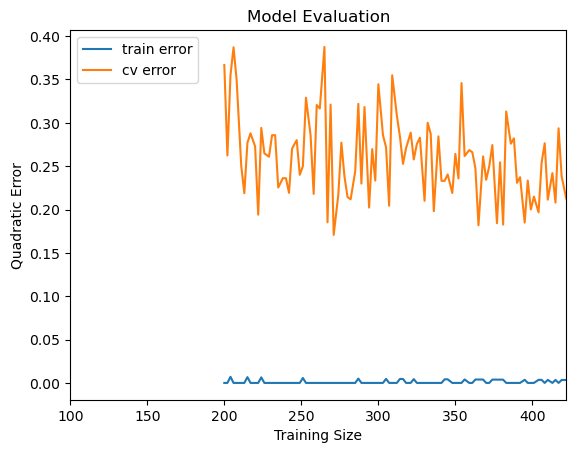

In [71]:

X = df_train["text"]
y = df_train["rating"]
text_normalizer = TextNormalizer(removestopwords=True,lowercase=True,getstemmer=True,removedigit=False)

X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

X = text_normalizer.fit_transform(X)
X = pd.Series(X)
plot_quad_error(X,y,svm)


 accuracy:  0.5261904761904762 


               precision    recall  f1-score   support

       false       0.51      0.92      0.66       210
        true       0.63      0.13      0.21       210

    accuracy                           0.53       420
   macro avg       0.57      0.53      0.44       420
weighted avg       0.57      0.53      0.44       420

Confusion matrix, without normalization


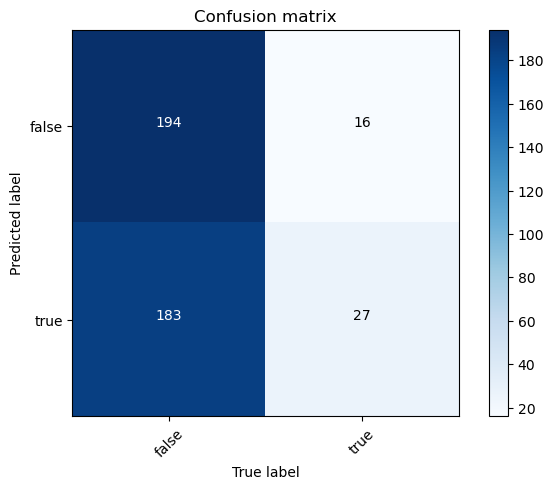

In [72]:

X_test,y_test = df_test["text"],df_test["rating"]
y_pred = svm.predict(X_test)
print('\n accuracy: ', accuracy_score(y_pred, y_test),'\n')

print('\n',classification_report(y_test, y_pred))
plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes = target_names)

### MultinominalNB

In [73]:

X = df_train["text"]
y = df_train["rating"] 

X_s = X #  X.sample(300) # X if X.shape[0] <=700 else X.sample(700)
y_s = y.loc[X_s.index]
preprocess_selection("MuntinomialNB",MultinomialNB(),X_s,y_s)

Evaluation des différentes configurations : 
Pipeline             Score
-----------------  -------
CV_brut             0.7914
CV_lowStop          0.7725
CV_lowcase          0.7725
TFIDF_lowStopna     0.7654
TFIDF_lowStopstem   0.7631
CV_lowStopstem      0.7630
CV_lowStopna        0.7606
TFIDF_lowStop       0.7583
TFIDF_brut          0.7370
TFIDF_lowcase       0.7347


In [74]:

X = df_train["text"]
y = df_train["rating"]
# put text normalizer in the pipe is a bad idea because of the very long time processing
text_normalizer = TextNormalizer(removestopwords=True,lowercase=True,getstemmer=True,removedigit=False)
X = text_normalizer.fit_transform(X)
X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.7,random_state=42)

pipe = Pipeline([('vect', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])

grid = {'clf__alpha': np.linspace(0.5, 1.5, 6),
        'clf__fit_prior': [True, False],}

gd_srMNB = GridSearchCV(pipe,  
                     param_grid=grid,
                     scoring='accuracy',
                     cv=10,
#                      n_jobs=-1,
                    return_train_score=True)

gd_srMNB.fit(X_train, y_train)
print('meilleur score ',
 gd_srMNB.best_score_,'\n')
print('meilleurs paramètres',
 gd_srMNB.best_params_,'\n')
print('meilleur estimateur',
gd_srMNB.best_estimator_,'\n')

meilleur score  0.7589655172413794 

meilleurs paramètres {'clf__alpha': 1.1, 'clf__fit_prior': False} 

meilleur estimateur Pipeline(steps=[('vect', TfidfVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=1.1, fit_prior=False))]) 




 accuracy:  0.7559055118110236 


               precision    recall  f1-score   support

       false       0.80      0.69      0.74        64
        true       0.72      0.83      0.77        63

    accuracy                           0.76       127
   macro avg       0.76      0.76      0.75       127
weighted avg       0.76      0.76      0.75       127

Confusion matrix, without normalization


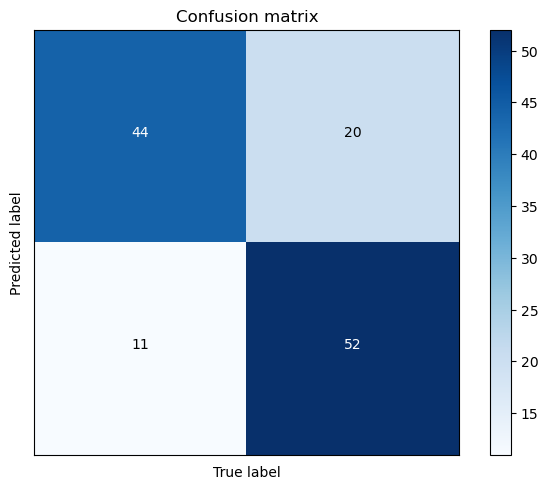

In [75]:

#Creation d'une instance de l'algorithme en utilisant les meilleurs paramètres
mNB = gd_srMNB.best_estimator_

mNB.fit(X_train, y_train)
y_pred = mNB.predict(X_val)
print('\n accuracy: ', accuracy_score(y_pred, y_val),'\n')

print('\n',classification_report(y_val, y_pred))
plot_confusion_matrix(confusion_matrix(y_val, y_pred))
     

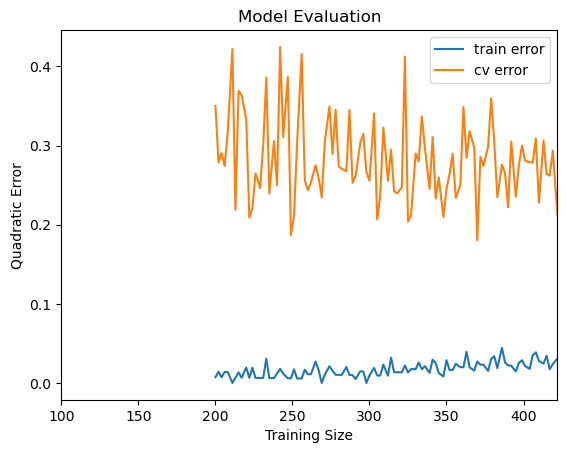

In [76]:

X = df_train["text"]
y = df_train["rating"]
text_normalizer = TextNormalizer(removestopwords=True,lowercase=True,getstemmer=True,removedigit=False)

X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

X = text_normalizer.fit_transform(X)
X = pd.Series(X)
plot_quad_error(X,y,mNB)


 accuracy:  0.5857142857142857 


               precision    recall  f1-score   support

       false       0.56      0.81      0.66       210
        true       0.66      0.36      0.47       210

    accuracy                           0.59       420
   macro avg       0.61      0.59      0.56       420
weighted avg       0.61      0.59      0.56       420

Confusion matrix, without normalization


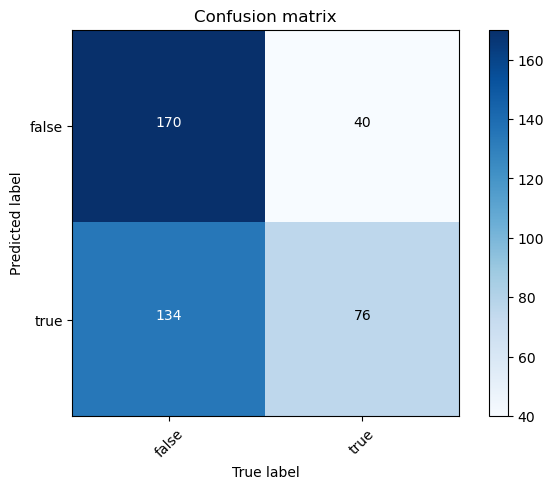

In [77]:

X_test,y_test = df_test["text"],df_test["rating"]
y_pred = mNB.predict(X_test)
print('\n accuracy: ', accuracy_score(y_pred, y_test),'\n')

print('\n',classification_report(y_test, y_pred))
plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes = target_names)

### RandomForest

In [78]:
X = df_train["text"]
y = df_train["rating"] 

X_s = X #  X.sample(300) # X if X.shape[0] <=700 else X.sample(700)
y_s = y.loc[X_s.index]
preprocess_selection("RandomForest",RandomForestClassifier(random_state=42),X_s,y_s)

Evaluation des différentes configurations : 
Pipeline             Score
-----------------  -------
TFIDF_brut          0.7466
CV_lowStop          0.7395
TFIDF_lowStopna     0.7370
TFIDF_lowStopstem   0.7348
TFIDF_lowStop       0.7300
CV_lowcase          0.7299
CV_lowStopstem      0.7299
TFIDF_lowcase       0.7276
CV_lowStopna        0.7205
CV_brut             0.7062


In [79]:
X = df_train["text"]
y = df_train["rating"]
# put text normalizer in the pipe is a bad idea because of the very long time processing
text_normalizer = TextNormalizer(removestopwords=True,lowercase=True,getstemmer=True,removedigit=False)
X = text_normalizer.fit_transform(X)
X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.7,random_state=42)

pipe = Pipeline([('vect', TfidfVectorizer()),
               ('clf', RandomForestClassifier()),
              ])



parameters = { 
    'clf__n_estimators': list(range(50,125,25)),   #[500, 1200],
    'clf__max_depth': list(range(60,81,2)),    # [25, 30],
    'clf__min_samples_split': [5, 10, 15],
    'clf__min_samples_leaf' : [1, 2], 
    }

gd_srMNB = GridSearchCV(pipe,  
                     param_grid=parameters,
                     scoring='accuracy',
                     cv=10,
#                      n_jobs=-1,
                    return_train_score=True)

gd_srMNB.fit(X_train, y_train)
print('meilleur score ',
 gd_srMNB.best_score_,'\n')
print('meilleurs paramètres',
 gd_srMNB.best_params_,'\n')
print('meilleur estimateur',
gd_srMNB.best_estimator_,'\n')

meilleur score  0.7488505747126437 

meilleurs paramètres {'clf__max_depth': 62, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 10, 'clf__n_estimators': 50} 

meilleur estimateur Pipeline(steps=[('vect', TfidfVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 RandomForestClassifier(max_depth=62, min_samples_leaf=2,
                                        min_samples_split=10,
                                        n_estimators=50))]) 




 accuracy:  0.6614173228346457 


               precision    recall  f1-score   support

       false       0.69      0.59      0.64        64
        true       0.64      0.73      0.68        63

    accuracy                           0.66       127
   macro avg       0.66      0.66      0.66       127
weighted avg       0.67      0.66      0.66       127

Confusion matrix, without normalization


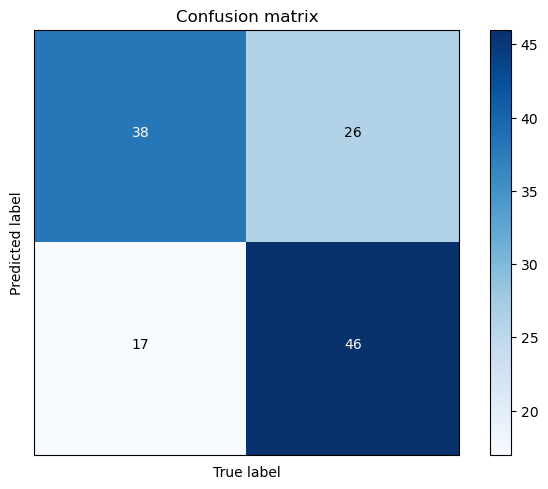

In [80]:
rfc = gd_srMNB.best_estimator_



rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_val)
print('\n accuracy: ', accuracy_score(y_pred, y_val),'\n')

print('\n',classification_report(y_val, y_pred))
plot_confusion_matrix(confusion_matrix(y_val, y_pred))

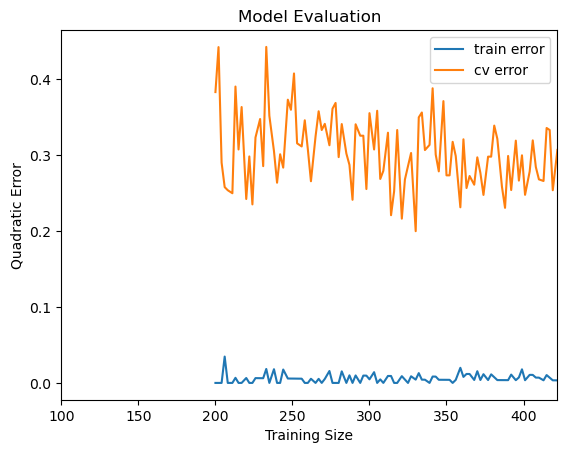

In [81]:
X = df_train["text"]
y = df_train["rating"]
text_normalizer = TextNormalizer(removestopwords=True,lowercase=True,getstemmer=True,removedigit=False)

X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

X = text_normalizer.fit_transform(X)
X = pd.Series(X)
plot_quad_error(X,y,rfc)


 accuracy:  0.5357142857142857 


               precision    recall  f1-score   support

       false       0.52      0.95      0.67       210
        true       0.71      0.12      0.20       210

    accuracy                           0.54       420
   macro avg       0.62      0.54      0.44       420
weighted avg       0.62      0.54      0.44       420

Confusion matrix, without normalization


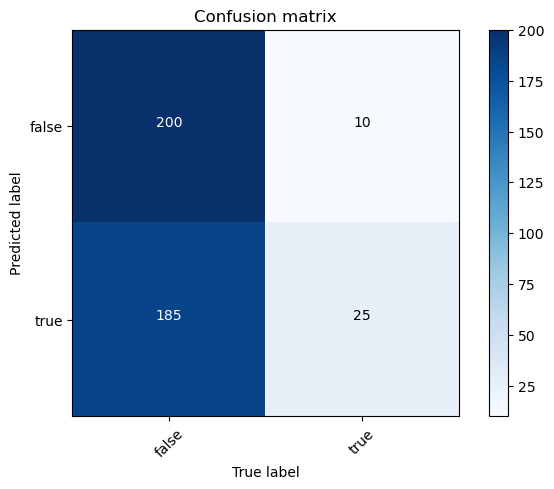

In [82]:
X_test,y_test = df_test["text"],df_test["rating"]
y_pred = rfc.predict(X_test)
print('\n accuracy: ', accuracy_score(y_pred, y_test),'\n')

print('\n',classification_report(y_test, y_pred))
plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes = target_names)

In [83]:
models = pd.DataFrame({
    
    "Models": ["Logistic Regression" , "SVM", "Multinominal Naive Bayes","Random Forest Classifier"],
    "Score":[lr.score(X_test,y_test), svm.score(X_test,y_test), mNB.score(X_test,y_test), rfc.score(X_test,y_test)]
    
})
models.sort_values(by="Score" , ascending=False)

,Models,Score
2,Multinominal Naive Bayes,0.585714
3,Random Forest Classifier,0.535714
1,SVM,0.526190
0,Logistic Regression,0.514286


### Modeles avec les reseaux de neuronnes

#### Modele de Transformateur generative pre-entraine (GPT)

In [ ]:
! pip install transformers

#### Convolutional Neural Network